In [122]:
#this notebook implements Logistic Regression on a linearly seperable toy dataset with two classes. This is done from 
#scatch making use of only numpy for matrix computations and matplotlib for ploting. 

In [123]:
import numpy as np
import random
import matplotlib.pyplot as plt

In [124]:
data=np.loadtxt("logistic_data.txt")
print(data.shape)

(100, 3)


In [125]:
L=[random.randint(0,99) for j in range(100)]

In [126]:
toy_set = data[L]

In [127]:
ind_1 = []
ind_2 = []
for i in range(toy_set.shape[0]):
    if toy_set[i][2]==0:
        ind_1.append((toy_set[i][0],toy_set[i][1]))
    else:
        ind_2.append((toy_set[i][0],toy_set[i][1]))

In [128]:
ind_1_x = [ind_1[i][0] for i in range(len(ind_1))]
ind_1_y = [ind_1[i][1] for i in range(len(ind_1))]

ind_2_x = [ind_2[i][0] for i in range(len(ind_2))]
ind_2_y = [ind_2[i][1] for i in range(len(ind_2))]

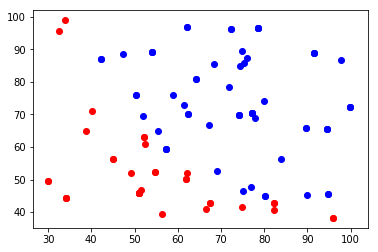

In [129]:
plt.scatter(ind_1_x,ind_1_y,color='red')
plt.scatter(ind_2_x,ind_2_y,color='blue')
plt.show()

In [130]:
X = toy_set[:,0:2]
y = toy_set[:,2]

In [131]:
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

In [132]:
def initialize_weights(num_features):
    return np.zeros((1,num_features+1))

In [133]:
weights = initialize_weights(2)
weights = weights.T

In [134]:
#this function takes as inputs: 
    # X: (array) a mxn matrix of un-normalized training data (Column of ones not yet added) 
    # y: (array) a mx1 matrix of labels 
    # theta: (array) initialized weights 
    # num_iter: (int) the number of steps to take in gradient descent 
    # alpha: (float) learning rate 
#this function will first normalize our training data then fit a logistic regression model on our linear seperable data. The function will return:
    # theta: the optimal weights found after num_iter
    # cost_history: a list containing tuples with (nth iteration,cost at nth iteration)
    # score: the percent of correct predictions 
    # predictions: a list containing the output of our model 
    
def logistic_regression(X,y,theta,num_iter,alpha):

    Xnorm = np.zeros((X.shape))
    for i in range(X.shape[1]):
        mu = np.mean(X[:,i])
        sigma = np.std(X[:,i])
        Xnorm[:,i] = (X[:,i] - mu)/sigma

    col_ones = np.ones((X.shape[0],1))
    Xnew = np.append(col_ones,Xnorm,axis=1)

    m, n = Xnew.shape
    y = y.reshape(m,1)

    cost_history = []

    for j in range(num_iter):
        J = 0
        temp_weights = np.zeros((theta.shape))
        temp_weights = np.asmatrix(temp_weights)
        h = sigmoid(Xnew.dot(theta))
        grad =  Xnew.T.dot(h - y)

        for k in range(m):
            J+= (-1/m)*(y[k]*np.log(sigmoid(np.dot(Xnew[k,:],theta))) + (1-y[k])*np.log(1-sigmoid(np.dot(Xnew[k,:],theta))))

        for l in range(n):
            temp_weights[l] = theta[l] - alpha*(grad[l])
        theta = temp_weights
        cost_history.append((j,J))


    predictions = []
    for M in range(m):
        if(sigmoid(np.dot(Xnew[M,:],theta))>=0.5):
            predictions.append(1)
        else:
            predictions.append(0)
    count = 0
    for N in range(len(predictions)):
        if predictions[N] == y[N]:
            count+=1
    score = float(count/m)

    return theta,cost_history,score,predictions

In [135]:
optimal_weights,cost_hist,accuracy,output = (logistic_regression(X,y,weights,50,.01))

In [136]:
cost_x = [cost_hist[i][0] for i in range(len(cost_hist))]
cost_y = [cost_hist[i][1] for i in range(len(cost_hist))]

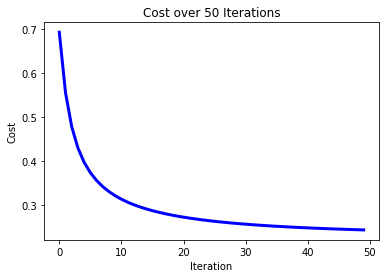

In [137]:
plt.plot(cost_x,cost_y,linewidth = 3,color='b')
plt.title('Cost over 50 Iterations')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.show()

In [138]:
Xnorm = np.zeros((X.shape))
for i in range(X.shape[1]):
    mu = np.mean(X[:,i])
    sigma = np.std(X[:,i])
    Xnorm[:,i] = (X[:,i] - mu)/sigma

In [139]:
ind0 = []
ind1 = []
for i in range(Xnorm.shape[0]):
    if output[i] == 0:
        ind0.append(Xnorm[i,:])
    else:
        ind1.append(Xnorm[i,:])

In [140]:
ind0_x = [ind0[i][0] for i in range(len(ind0))]
ind0_y = [ind0[i][1] for i in range(len(ind0))]

ind1_x = [ind1[i][0] for i in range(len(ind1))]
ind1_y = [ind1[i][1] for i in range(len(ind1))]

In [141]:
def desicion_boundary(x,theta):
    return -(float(theta[0])+float(theta[1])*x)/float(theta[2])

In [142]:
xvals = np.arange(-2, 2, 0.1)

In [143]:
yvals = []
for i in range(len(xvalues)):
    yvals.append(desicion_boundary(xvalues[i],optimal_weights))

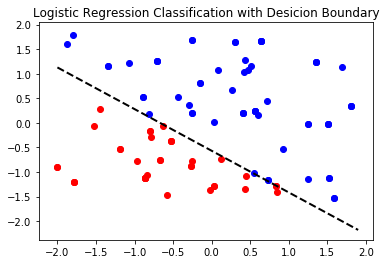

In [144]:
plt.plot(xvals,yvals,linewidth=2,linestyle = 'dashed',color='black')
plt.scatter(ind0_x,ind0_y,color = 'red')
plt.scatter(ind1_x,ind1_y,color = 'blue')
plt.title('Logistic Regression Classification with Desicion Boundary')
plt.show()

In [158]:
print("The accuarcy of this model is: {}%".format(accuracy*100))

The accuarcy of this model is: 90.0%
